In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Load dataset
df = pd.read_csv("breast-cancer.csv")

#Drop 'id' column if exists
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

#Encode target column: M → 1, B → 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [22]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [25]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [26]:
rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_model.fit(X_train, y_train)
y_pred_rbf = rbf_model.predict(X_test)

In [27]:
#Linear SVM Evaluation
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear)*100)
print("Confusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report (Linear):\n", classification_report(y_test, y_pred_linear))

#RBF SVM Evaluation
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf)*100)
print("Confusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

Linear SVM Accuracy: 95.6140350877193
Confusion Matrix (Linear):
 [[68  3]
 [ 2 41]]
Classification Report (Linear):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF SVM Accuracy: 97.36842105263158
Confusion Matrix (RBF):
 [[70  1]
 [ 2 41]]
Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [28]:
cv_scores = cross_val_score(rbf_model, X_scaled, y, cv=5)
print(f"Cross-validated Accuracy (RBF SVM): {cv_scores.mean()*100:.3f}")

Cross-validated Accuracy (RBF SVM): 97.364


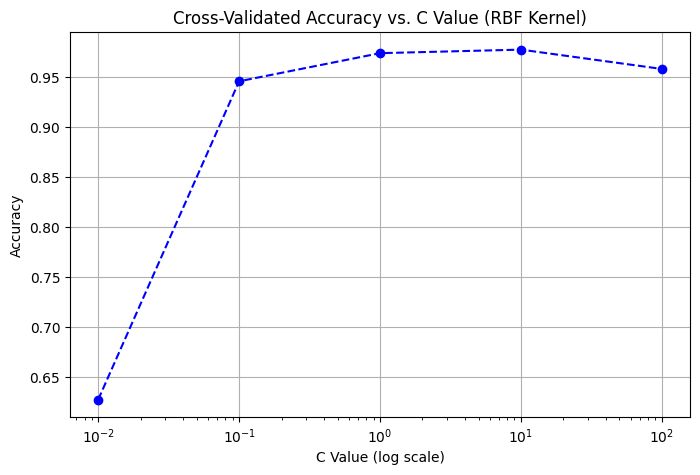

In [29]:
C_values = [0.01, 0.1, 1, 10, 100]
cv_results = []

for c in C_values:
    model = SVC(kernel='rbf', C=c)
    score = cross_val_score(model, X_scaled, y, cv=5).mean()
    cv_results.append(score)

plt.figure(figsize=(8, 5))
plt.plot(C_values, cv_results, marker='o', linestyle='--', color='blue')
plt.xscale('log')
plt.title("Cross-Validated Accuracy vs. C Value (RBF Kernel)")
plt.xlabel("C Value (log scale)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()